In [1]:
# import libraries

from numpy import *
from numpy.random import *
from datascience import *
import pandas as pd
import numpy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import json
import os
from branca.colormap import linear
import branca.colormap

In [2]:
#opening the data
# df = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present (web).csv')
df_small = pd.read_csv('Sample_10k_Police_Department_Incident_Reports__2018_to_Present.csv')
df_small.shape


# incident_data_np = Table().read_table('Sample_10k_Police_Department_Incident_Reports__2018_to_Present.csv')
# incident_data_np

(10000, 36)

In [56]:
#let's convert the 'Incident Datetime' column to datetime format: https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime#:~:text=Use%20the%20pandas%20to_datetime%20function%20to%20parse%20the%20column%20as%20DateTime.%20Also%2C%20by%20using%20infer_datetime_format
# df['Incident Datetime'] =  pd.to_datetime(df['Incident Datetime'], infer_datetime_format=True)
df_small['Incident Datetime'] =  pd.to_datetime(df_small['Incident Datetime'], infer_datetime_format=True)

df_small.head()

,Index,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,...,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,Hour
0,152984,2021-07-07 20:00:00,2021/07/07,20:00:00,2021,Wednesday,2021/07/08 01:34:00 PM,104872606244,1048726,216090269,...,POINT (-122.42645223923668 37.77738819387254),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0,20
1,198315,2021-12-09 14:00:00,2021/12/09,14:00:00,2021,Thursday,2021/12/09 02:00:00 PM,110070464085,1100704,210814534,...,POINT (-122.4124117474483 37.783004077643476),20.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0,14
2,510741,2020-07-29 20:21:00,2020/07/29,20:21:00,2020,Wednesday,2020/08/12 02:28:00 PM,95345506372,953455,206121915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
3,125080,2021-10-09 07:50:00,2021/10/09,07:50:00,2021,Saturday,2021/10/09 08:18:00 AM,107881116623,1078811,210658398,...,POINT (-122.41607173623363 37.784448840613585),20.0,NaN,1.0,NaN,NaN,NaN,10.0,5.0,7
4,487908,2020-10-22 19:02:00,2020/10/22,19:02:00,2020,Thursday,2020/10/22 07:18:00 PM,97181006362,971810,200638742,...,POINT (-122.42196876280964 37.74237539724614),83.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,19


# 3 Descriptive Statistics

3.1) Plot the number of incidents per year from 2018 to present (choose the appropriate type of plot). Have crime rates increased or decreased in general?

We can see a slight decrease, although the data is incomplete for 2022. My immediate guess is that there are external factors (COVID) that reduced reported crimes in 2020 and 2021.


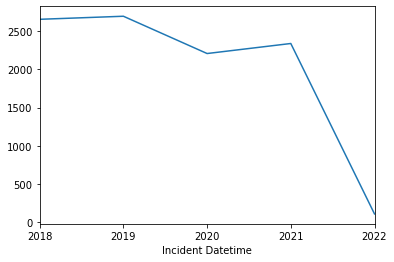

In [4]:
grouped_year_pd = df_small.groupby(pd.Grouper(key ='Incident Datetime', freq='Y')).size()
grouped_year_pd_plot = grouped_year_pd.plot()
grouped_year_pd_plot
print('We can see a slight decrease, although the data is incomplete for 2022. My immediate guess is that there are external factors (COVID) that reduced reported crimes in 2020 and 2021.')

3.2) To get a more granular look, plot the number of incidents per month per year from 2018 to present. How does added granularity change your previous analysis of crime rate increase or decrease?

This reveals a lot more. I think my original theory about crime dropping at the beginning of covid was correct - although it seems the variability of crime didnt completely dissapear, it only shrunk slightly and is beginning to return at the end of 2021.


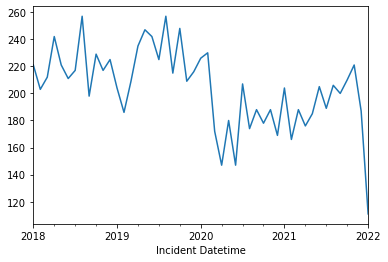

In [5]:
# df_original.groupby(pd.Grouper(key='Date',freq='M')).sum()
# df.groupby(pd.Grouper(key='Date', freq='2Y')).sum() https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/
# for the plot: https://www.statology.org/pandas-groupby-plot/#:~:text=a%20pandas%20DataFrame%3A-,Method%201%3A%20Group%20By%20%26%20Plot%20Multiple%20Lines%20in%20One%20Plot,-%23define%20index%20column
grouped_month_pd = df_small.groupby(pd.Grouper(key ='Incident Datetime', freq='M')).size()
grouped_month_pd_plot = grouped_month_pd.plot()
print('This reveals a lot more. I think my original theory about crime dropping at the beginning of covid was correct - although it seems the variability of crime didnt completely dissapear, it only shrunk slightly and is beginning to return at the end of 2021.')

3.3) Check to see if these relationships change when looking at particular types of crime.
Plot and explain your findings.

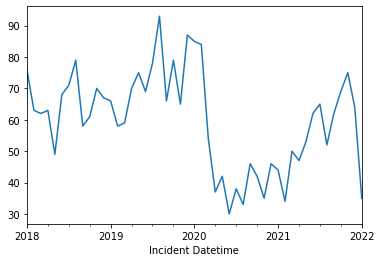

In [6]:
grouped_by_larc_theft = df_small.loc[df_small['Incident Category'] == 'Larceny Theft']
grouped_by_larc_theft_plot = grouped_by_larc_theft.groupby(pd.Grouper(key ='Incident Datetime', freq='M')).size().plot()

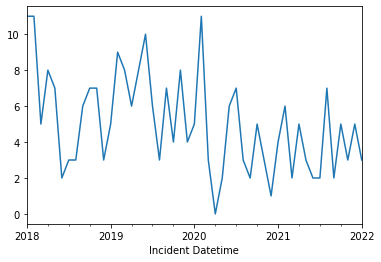

In [7]:
grouped_by_drug_off = df_small.loc[df_small['Incident Category'] == 'Drug Offense']
grouped_by_drug_off_plot = grouped_by_drug_off.groupby(pd.Grouper(key ='Incident Datetime', freq='M')).size().plot()

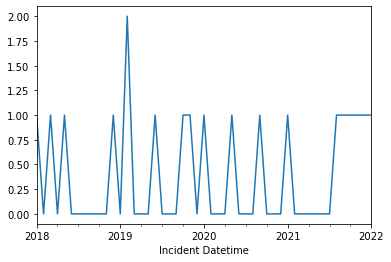

In [8]:
grouped_by_traff_coll = df_small.loc[df_small['Incident Category'] == 'Traffic Collision']
grouped_by_traff_coll_plot = grouped_by_traff_coll.groupby(pd.Grouper(key ='Incident Datetime', freq='M')).size().plot()

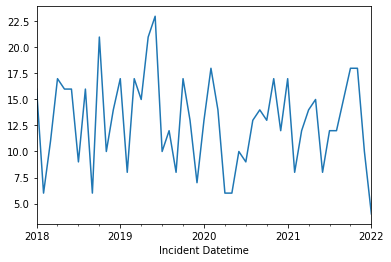

In [9]:
grouped_by_ass = df_small.loc[df_small['Incident Category'] == 'Assault']
grouped_by_ass_plot = grouped_by_ass.groupby(pd.Grouper(key ='Incident Datetime', freq='M')).size().plot()

I again notice that almost all of these dropped right at the beginning of 2020. HOWEVER, some bounced back, while others, like traff_arrest, have stayed much lower since. Some havent been affected at all. I tried to put together a multi-line plot based on a dataframe for-loop, but need help. Ill come to OH for this.


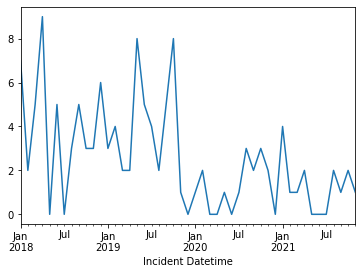

In [10]:
grouped_by_traff_arrest = df_small.loc[df_small['Incident Category'] == 'Traffic Violation Arrest']
grouped_by_traff_arrest_plot = grouped_by_traff_arrest.groupby(pd.Grouper(key ='Incident Datetime', freq='M')).size().plot()
print('I again notice that almost all of these dropped right at the beginning of 2020. HOWEVER, some bounced back, while others, like traff_arrest, have stayed much lower since. Some havent been affected at all. I tried to put together a multi-line plot based on a dataframe for-loop, but need help. Ill come to OH for this.')

3.4) Looking just at 2019, what proportion of the total does each type of crime constitute? Use at least one table and at least one plot to support your
answer.

In [11]:
df_inc_cats = df_small['Incident Category'].unique()
df_inc_cats
# grouped_by_inc_cat = df_small.groupby('Incident Category').size()
# grouped_by_inc_cat.bar()

array(['Larceny Theft', 'Other Miscellaneous', 'Drug Offense',
       'Traffic Collision', 'Recovered Vehicle', 'Assault',
       'Lost Property', 'Traffic Violation Arrest', 'Suspicious Occ',
       'Offences Against The Family And Children', 'Disorderly Conduct',
       'Non-Criminal', 'Robbery', 'Other Offenses', 'Missing Person',
       'Malicious Mischief', 'Burglary', 'Motor Vehicle Theft',
       'Stolen Property', nan, 'Fraud', 'Miscellaneous Investigation',
       'Warrant', 'Weapons Offense', 'Arson', 'Case Closure',
       'Weapons Carrying Etc', 'Embezzlement', 'Other', 'Vandalism',
       'Forgery And Counterfeiting', 'Civil Sidewalks', 'Fire Report',
       'Prostitution', 'Courtesy Report', 'Suspicious', 'Suicide',
       'Drug Violation', 'Sex Offense', 'Vehicle Misplaced',
       'Vehicle Impounded', 'Human Trafficking (A), Commercial Sex Acts',
       'Rape', 'Homicide', 'Human Trafficking, Commercial Sex Acts'],
      dtype=object)

In [ ]:
df_small_2019 = df_small.where(df_small['Incident Year'] == '2019')

In [314]:
#lets assign all of the proportion values!
#https://docs.google.com/spreadsheets/d/1og9wdA6naXmtwbI0wGlyZyrBGwUWpejHeGxgZ63Ff28/edit#gid=182168944&range=L2
#replace all: https://docs.google.com/document/d/1_dJJaWkMrsoOL0B3bJIC3Q3XkYd9Y4QXkomBBZkcGus/edit
larceny_theft_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Larceny Theft'].size / df_small_2019.size
arson_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Arson'].size / df_small_2019.size
assault_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Assault'].size / df_small_2019.size
burglary_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Burglary'].size / df_small_2019.size
case_closure_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Case Closure'].size / df_small_2019.size
civil_sidewalks_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Civil Sidewalks'].size / df_small_2019.size
commercial_sex_acts_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Commercial Sex Acts'].size / df_small_2019.size
courtesy_report_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Courtesy Report'].size / df_small_2019.size
disorderly_conduct_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Disorderly Conduct'].size / df_small_2019.size
drug_offense_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Drug Offense'].size / df_small_2019.size
drug_violation_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Drug Violation'].size / df_small_2019.size
embezzlement_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Embezzlement'].size / df_small_2019.size
fire_report_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Fire Report'].size / df_small_2019.size
forgery_and_counterfeiting_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Forgery And Counterfeiting'].size / df_small_2019.size
fraud_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Fraud'].size / df_small_2019.size
homicide_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Homicide'].size / df_small_2019.size
human_trafficking_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Human Trafficking'].size / df_small_2019.size
human_trafficking_a_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Human Trafficking (A)'].size / df_small_2019.size
lost_property_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Lost Property'].size / df_small_2019.size
malicious_mischief_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Malicious Mischief'].size / df_small_2019.size
miscellaneous_investigation_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Miscellaneous Investigation'].size / df_small_2019.size
missing_person_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Missing Person'].size / df_small_2019.size
motor_vehicle_theft_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Motor Vehicle Theft'].size / df_small_2019.size
nan_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'nan'].size / df_small_2019.size
non_criminal_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Non-Criminal'].size / df_small_2019.size
offences_against_the_family_and_children_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Offences Against The Family And Children'].size / df_small_2019.size
other_miscellaneous_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Other Miscellaneous'].size / df_small_2019.size
other_offenses_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Other Offenses'].size / df_small_2019.size
other_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Other'].size / df_small_2019.size
prostitution_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Prostitution'].size / df_small_2019.size
rape_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Rape'].size / df_small_2019.size
recovered_vehicle_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Recovered Vehicle'].size / df_small_2019.size
robbery_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Robbery'].size / df_small_2019.size
sex_offense_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Sex Offense'].size / df_small_2019.size
stolen_property_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Stolen Property'].size / df_small_2019.size
suicide_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Suicide'].size / df_small_2019.size
suspicious_occ_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Suspicious Occ'].size / df_small_2019.size
suspicious_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Suspicious'].size / df_small_2019.size
traffic_collision_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Traffic Collision'].size / df_small_2019.size
traffic_violation_arrest_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Traffic Violation Arrest'].size / df_small_2019.size
vandalism_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Vandalism'].size / df_small_2019.size
vehicle_impounded_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Vehicle Impounded'].size / df_small_2019.size
vehicle_misplaced_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Vehicle Misplaced'].size / df_small_2019.size
warrant_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Warrant'].size / df_small_2019.size
weapons_carrying_etc_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Weapons Carrying Etc'].size / df_small_2019.size
weapons_offense_prop = df_small_2019.loc[df_small_2019['Incident Category'] == 'Weapons Offense'].size / df_small_2019.size

In [315]:
# crim_inc_prop_arr = pd.array([larceny_theft_prop,arson_prop,assault_prop,burglary_prop,case_closure_prop,civil_sidewalks_prop,commercial_sex_acts_prop,courtesy_report_prop,disorderly_conduct_prop,drug_offense_prop,drug_violation_prop,embezzlement_prop,fire_report_prop,forgery_and_counterfeiting_prop,fraud_prop,homicide_prop,human_trafficking_prop,human_trafficking_(a)_prop,lost_property_prop,malicious_mischief_prop,miscellaneous_investigation_prop,missing_person_prop,motor_vehicle_theft_prop,nan_prop,non-criminal_prop,offences_against_the_family_and_children_prop,other_miscellaneous_prop,other_offenses_prop,other_prop,prostitution_prop,rape_prop,recovered_vehicle_prop,robbery_prop,sex_offense_prop,stolen_property_prop,suicide_prop,suspicious_occ_prop,suspicious_prop,traffic_collision_prop,traffic_violation_arrest_prop,vandalism_prop,vehicle_impounded_prop,vehicle_misplaced_prop,warrant_prop,weapons_carrying_etc_prop,weapons_offense_prop], dtype=int)
# crim_inc_prop_name_arr = pd.array(['Larceny Theft','Arson']) #,'Assault','Burglary','Case Closure','Civil Sidewalks','Commercial Sex Acts','Courtesy Report','Disorderly Conduct','Drug Offense','Drug Violation','Embezzlement','Fire Report','Forgery And Counterfeiting','Fraud','Homicide','Human Trafficking','Human Trafficking (A)','Lost Property','Malicious Mischief','Miscellaneous Investigation','Missing Person','Motor Vehicle Theft','nan','Non-Criminal','Offences Against The Family And Children','Other Miscellaneous','Other Offenses','Other','Prostitution','Rape','Recovered Vehicle','Robbery','Sex Offense','Stolen Property','Suicide','Suspicious Occ','Suspicious','Traffic Collision','Traffic Violation Arrest','Vandalism','Vehicle Impounded','Vehicle Misplaced','Warrant','Weapons Carrying Etc','Weapons Offense'])

d = {'Crime Type': ['Larceny Theft','Arson','Assault','Burglary','Case Closure','Civil Sidewalks','Commercial Sex Acts','Courtesy Report','Disorderly Conduct','Drug Offense','Drug Violation','Embezzlement','Fire Report','Forgery And Counterfeiting','Fraud','Homicide','Human Trafficking','Human Trafficking (A)','Lost Property','Malicious Mischief','Miscellaneous Investigation','Missing Person','Motor Vehicle Theft','nan','Non-Criminal','Offences Against The Family And Children','Other Miscellaneous','Other Offenses','Other','Prostitution','Rape','Recovered Vehicle','Robbery','Sex Offense','Stolen Property','Suicide','Suspicious Occ','Suspicious','Traffic Collision','Traffic Violation Arrest','Vandalism','Vehicle Impounded','Vehicle Misplaced','Warrant','Weapons Carrying Etc','Weapons Offense'], 
     'Proportion of All Crimes': [larceny_theft_prop,arson_prop,assault_prop,burglary_prop,case_closure_prop,civil_sidewalks_prop,commercial_sex_acts_prop,courtesy_report_prop,disorderly_conduct_prop,drug_offense_prop,drug_violation_prop,embezzlement_prop,fire_report_prop,forgery_and_counterfeiting_prop,fraud_prop,homicide_prop,human_trafficking_prop,human_trafficking_a_prop,lost_property_prop,malicious_mischief_prop,miscellaneous_investigation_prop,missing_person_prop,motor_vehicle_theft_prop,nan_prop,non_criminal_prop,offences_against_the_family_and_children_prop,other_miscellaneous_prop,other_offenses_prop,other_prop,prostitution_prop,rape_prop,recovered_vehicle_prop,robbery_prop,sex_offense_prop,stolen_property_prop,suicide_prop,suspicious_occ_prop,suspicious_prop,traffic_collision_prop,traffic_violation_arrest_prop,vandalism_prop,vehicle_impounded_prop,vehicle_misplaced_prop,warrant_prop,weapons_carrying_etc_prop,weapons_offense_prop]}



In [318]:
#df.sort_values(by='col1', ascending=False)

crime_inc_prop_df = pd.DataFrame(data=d)
crime_inc_prop_df = crime_inc_prop_df.sort_values(by='Proportion of All Crimes', ascending = False)
crime_inc_prop_df

,Crime Type,Proportion of All Crimes
0,Larceny Theft,0.0865
26,Other Miscellaneous,0.0183
2,Assault,0.0168
19,Malicious Mischief,0.0160
24,Non-Criminal,0.0146
3,Burglary,0.0111
43,Warrant,0.0108
22,Motor Vehicle Theft,0.0102
18,Lost Property,0.0093
31,Recovered Vehicle,0.0085


<AxesSubplot:xlabel='Crime Type'>

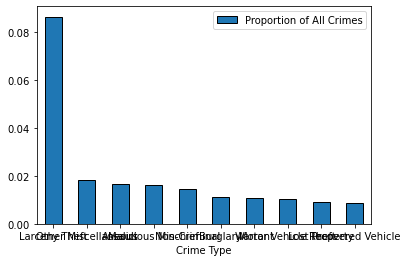

In [317]:
crime_inc_prop_df_top10 = crime_inc_prop_df.head(10)
crime_inc_prop_df_top10.plot.bar(x='Crime Type', y='Proportion of All Crimes', rot=0)
# how can I display this better? Ask in OH

3.5) Is there a relationship between day of week, time, and whether an incident occurs?

It looks like theres slightly more crimes happening on Friday and slightly less on the weekend, but largely the net number of crime incidents remains steady.


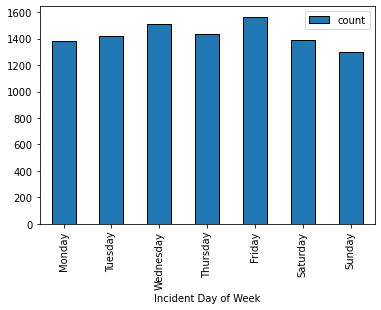

In [16]:
#I think I need to group this one by day and then count the number of incidents that occur by day. Same for time - maybe I can just group AM PM? That feels too simplified though.
#I might also make a graph? We'll see
#https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/
#for converting a groupby series output to df: https://intellipaat.com/community/1755/converting-a-pandas-groupby-output-from-series-to-dataframe
#df.sort_values(by='col1', ascending=False)


grouped_by_day = df_small.groupby(['Incident Day of Week']).size().to_frame(name = 'count').reset_index().reindex([1,5,6,4,0,2,3])
grouped_by_day
grouped_by_day.plot.bar(x = 'Incident Day of Week', y = 'count')
print('It looks like theres slightly more crimes happening on Friday and slightly less on the weekend, but largely the net number of crime incidents remains steady.')

3.6) Is there a relationship between day/time and particular types of incidents? What about time of year?

In [73]:
#Convert the 'Incident Time' column to datetime format

df_small["Incident Time"] = df_small['Incident Datetime'].dt.time
df_small.head()
# df_small_time_str = df_small
# df_small_time_str['Incident Time'] = df_small_time_str['Incident Time'].astype(str)

,Index,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,...,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts,Hour
0,152984,2021-07-07 20:00:00,2021/07/07,20:00:00,2021,Wednesday,2021/07/08 01:34:00 PM,104872606244,1048726,216090269,...,POINT (-122.42645223923668 37.77738819387254),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0,20
1,198315,2021-12-09 14:00:00,2021/12/09,14:00:00,2021,Thursday,2021/12/09 02:00:00 PM,110070464085,1100704,210814534,...,POINT (-122.4124117474483 37.783004077643476),20.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0,14
2,510741,2020-07-29 20:21:00,2020/07/29,20:21:00,2020,Wednesday,2020/08/12 02:28:00 PM,95345506372,953455,206121915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
3,125080,2021-10-09 07:50:00,2021/10/09,07:50:00,2021,Saturday,2021/10/09 08:18:00 AM,107881116623,1078811,210658398,...,POINT (-122.41607173623363 37.784448840613585),20.0,NaN,1.0,NaN,NaN,NaN,10.0,5.0,7
4,487908,2020-10-22 19:02:00,2020/10/22,19:02:00,2020,Thursday,2020/10/22 07:18:00 PM,97181006362,971810,200638742,...,POINT (-122.42196876280964 37.74237539724614),83.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0,19


In [82]:
grouped_time_pd = df_small.groupby(pd.Grouper(key ='Incident Datetime', freq='60min')).size().to_frame(name = 'Count')
grouped_time_pd#["Incident Datetime"] = pd.to_datetime(grouped_time_pd["Incident Datetime"])
# grouped_time_pd["Incident Datetime"].dt.strftime("%H-%M-%S")
# grouped_time_pd['Incident Datetime'].dt.time

,Count
Incident Datetime,
2018-01-01 06:00:00,2
2018-01-01 07:00:00,0
2018-01-01 08:00:00,0
2018-01-01 09:00:00,0
2018-01-01 10:00:00,0
...,...
2022-01-24 15:00:00,0
2022-01-24 16:00:00,0
2022-01-24 17:00:00,1


3.7) What neighborhoods experience the most crime? Do different neighborhoods experience different types of crimes at different rates, or is the distribution of crime spatially consistent across neighborhoods?

In [305]:
grouped_by_neighborhood_top10 = df_small.groupby(['Police District']).size().to_frame(name = 'Count').sort_values("Count", ascending = False).head(10).reset_index()
print(grouped_by_neighborhood_top10)

top_10_neighborhoods_list = grouped_by_neighborhood_top10['Police District'].tolist()
top_10_neighborhoods_total_crimes_list = grouped_by_neighborhood_top10['Count'].tolist()

#the issue with being unable to pull a list from a column here was that I hadn't reset the index. It wasn't it's own table. 

  Police District  Count
0         Central   1477
1         Mission   1327
2        Northern   1307
3        Southern   1177
4      Tenderloin    919
5         Bayview    892
6       Ingleside    813
7         Taraval    694
8        Richmond    626
9            Park    459


In [306]:
de = {'Neighborhood': (top_10_neighborhoods_list),
     'Total Crimes': (top_10_neighborhoods_total_crimes_list)}

crime_rate_by_neighborhood = pd.DataFrame(data = de)
crime_rate_by_neighborhood

,Neighborhood,Total Crimes
0,Central,1477
1,Mission,1327
2,Northern,1307
3,Southern,1177
4,Tenderloin,919
5,Bayview,892
6,Ingleside,813
7,Taraval,694
8,Richmond,626
9,Park,459


In [321]:
#you can check to make sure everything adds up (mostly) here: https://docs.google.com/spreadsheets/d/1og9wdA6naXmtwbI0wGlyZyrBGwUWpejHeGxgZ63Ff28/edit#gid=177725882&range=A43

for i in range(10):
    crime = (sorted_top_10_crime_list[i])
    city_crime_prop_arr = []
    
    for i in range(10):         
        city = (top_10_neighborhoods_list[i])
        city_crime_count = top_10_neighborhoods_total_crimes_list[i]
        just_city_df = df_small.where(df_small['Police District'] == city).dropna(subset = ['Police District']).reset_index()
        
        crime_prop = just_city_df.where(just_city_df['Incident Category'] == crime).dropna(subset = ['Incident Category']).reset_index()
        crime_prop_rate = len(crime_prop.index)/city_crime_count
        city_crime_prop_arr.append(crime_prop_rate)
        
        if len(city_crime_prop_arr) == 10:
            crime_rate_by_neighborhood[crime] = city_crime_prop_arr

crime_rate_by_neighborhood.head(10)

,Neighborhood,Total Crimes,Larceny Theft,Other Miscellaneous,Malicious Mischief,Assault,Burglary,Non-Criminal,Motor Vehicle Theft,Recovered Vehicle,Warrant,Lost Property
0,Central,1477,0.425186,0.078538,0.077861,0.047393,0.050779,0.060934,0.027082,0.008125,0.020988,0.035206
1,Mission,1327,0.250942,0.096458,0.063301,0.082140,0.057272,0.049736,0.055011,0.025622,0.051243,0.026375
2,Northern,1307,0.394032,0.066565,0.074981,0.048967,0.078041,0.045142,0.041316,0.018363,0.026014,0.026014
3,Southern,1177,0.271878,0.077315,0.077315,0.081563,0.071368,0.078165,0.040782,0.030586,0.039932,0.021240
4,Tenderloin,919,0.163221,0.103373,0.047878,0.101197,0.028292,0.060936,0.026115,0.018498,0.071817,0.026115
5,Bayview,892,0.211883,0.060538,0.091928,0.091928,0.052691,0.040359,0.096413,0.077354,0.015695,0.016816
6,Ingleside,813,0.209102,0.067651,0.078721,0.052891,0.070111,0.078721,0.089791,0.039360,0.020910,0.013530
7,Taraval,694,0.275216,0.047550,0.076369,0.038905,0.070605,0.069164,0.069164,0.033141,0.027378,0.027378
8,Richmond,626,0.410543,0.046326,0.071885,0.030351,0.076677,0.051118,0.054313,0.039936,0.017572,0.031949
9,Park,459,0.331155,0.056645,0.084967,0.047930,0.082789,0.041394,0.052288,0.028322,0.019608,0.026144


3.8) Discuss two other interesting findings from your data.

Check out just how high the variance is among larceny proportions compared to other categories! This makes sense given that it's such an umbrella category, but still! I made a graph to help visualize this. https://docs.google.com/spreadsheets/d/e/2PACX-1vReeum_vMwxMqaKamEMr5ZOiVQjbKL0GvfWx3wMeNhJ9ZEMwnI4yX1BrDqaz9gmgo2rWjLc6H-whR4Y/pubchart?oid=1183297275&format=interactive

Interestingly enough, Bayview and Tenderloin each hold three of the highest proportions of different crime types. I've created a dataframe to view this below, but if you also want a highlighted version of the table above, you can check out this link: https://docs.google.com/spreadsheets/d/1og9wdA6naXmtwbI0wGlyZyrBGwUWpejHeGxgZ63Ff28/edit#gid=30347846&range=A1:N15

In [327]:
dg = {'Crime Type': ['Larceny Theft','Other Miscellaneous','Malicious Mischief','Assault','Burglary','Non-Criminal','Motor Vehicle Theft','Recovered Vehicle','Warrant','Lost Property'],
      'District': ['Central','Tenderloin','Bayview','Tenderloin','Park','Ingleside','Bayview','Bayview','Tenderloin','Central'],
      'Proportion': [0.425186,0.103373,0.091928,0.101197,0.082789,0.078721,0.096413,0.077354,0.071817,0.035206]}

top_prop_by_dist_type = pd.DataFrame(data = dg)
top_prop_by_dist_type.sort_values(by = 'District')

,Crime Type,District,Proportion
2,Malicious Mischief,Bayview,0.091928
6,Motor Vehicle Theft,Bayview,0.096413
7,Recovered Vehicle,Bayview,0.077354
0,Larceny Theft,Central,0.425186
9,Lost Property,Central,0.035206
5,Non-Criminal,Ingleside,0.078721
4,Burglary,Park,0.082789
1,Other Miscellaneous,Tenderloin,0.103373
3,Assault,Tenderloin,0.101197
8,Warrant,Tenderloin,0.071817
